In [1]:
## We import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
## We load our train and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
## We define our x_train and y_train

x_train = train.drop('label', axis = 1)/255
y_train = train['label']

In [4]:
## We get dummies of the digits 0-9

y = pd.get_dummies(y_train)

In [6]:
## tf keras requires array inputs

x = x_train.values
y = y.values

In [7]:
## We split our data into train and validation (test) data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 420)

In [8]:
## We define our nnet with input layer of 784 features (28 X 28 features). 
## We then add 5 layers with 512, 256, 128, 64, 32 neurons
## The final layer will output 10 digits
## We add dropouts. We use adam optimizer. 
## Since we have multiple categories, we take loss as categorical_crossentropy
## We try to maximize the accuracy metric

model = Sequential()
model.add(Dense(784 ,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512 ,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256 ,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128 ,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64 ,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
## We now define an early stopping to avoid overfitting. 
## If validation accuracy doesnt improve, we wait for 10 epochs before stopping.
## We start our model training

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=x_train, 
          y=y_train, 
          epochs=100, batch_size = 32,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 29400 samples, validate on 12600 samples
Epoch 1/100
29400/29400 [==============================] - 53s 2ms/sample - loss: 1.3061 - accuracy: 0.5311 - val_loss: 0.4158 - val_accuracy: 0.9009
Epoch 2/100
29400/29400 [==============================] - 49s 2ms/sample - loss: 0.5764 - accuracy: 0.8512 - val_loss: 0.2693 - val_accuracy: 0.9390
Epoch 3/100
29400/29400 [==============================] - 53s 2ms/sample - loss: 0.4273 - accuracy: 0.8979 - val_loss: 0.2211 - val_accuracy: 0.9487
Epoch 4/100
29400/29400 [==============================] - 52s 2ms/sample - loss: 0.3518 - accuracy: 0.9200 - val_loss: 0.2178 - val_accuracy: 0.9517
Epoch 5/100
29400/29400 [==============================] - 52s 2ms/sample - loss: 0.3222 - accuracy: 0.9293 - val_loss: 0.1756 - val_accuracy: 0.9603
Epoch 6/100
29400/29400 [==============================] - 51s 2ms/sample - loss: 0.2925 - accuracy: 0.9362 - val_loss: 0.1616 - val_accuracy: 0.9618
Epoch 7/100
29400/29400 [=========================

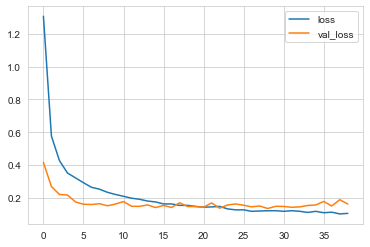

In [11]:
## We plot our model to see that the train and validation accuracy are almost equal and imporving together. 
## This is what we desire.

pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [ ]:
## Let us test our model with predictions on our test data. 

# pred = model.predict_classes(test.values/255)

In [ ]:
## We save our submissions for kaggle

## solution = pd.DataFrame({"ImageId":np.arange(28001)[1:], "Label":pred})

In [ ]:
## solution.to_csv("submission2.csv", index = False)